In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
import pandas as pd

Matplotlib version:  3.0.2


In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv('Data-Collisions.csv')

--2020-09-03 12:18:53--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.5MB/s   in 1.6s   

2020-09-03 12:18:55 (43.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [5]:
df['Total'] = df.sum(axis=1)
df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')
df['Month']=df['INCDATE'].dt.strftime('%B')
df['Weekday']=df['INCDATE'].dt.strftime('%a')
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Total,Month,Weekday
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,4.003438e+04,March,Wed
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,6.458388e+06,December,Wed
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,4.376382e+06,November,Thu
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2.236270e+03,March,Fri
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,4.097768e+06,January,Wed


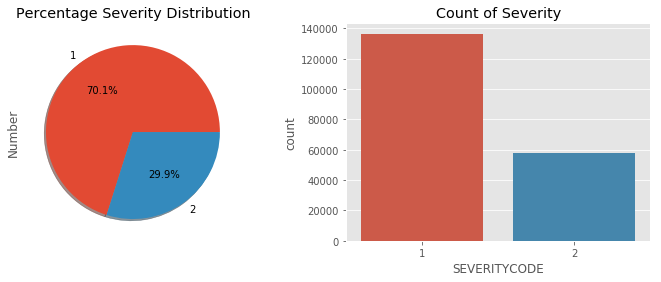

In [6]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['SEVERITYCODE'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Number')
sns.countplot('SEVERITYCODE',data=df,ax=ax[1],order=df['SEVERITYCODE'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

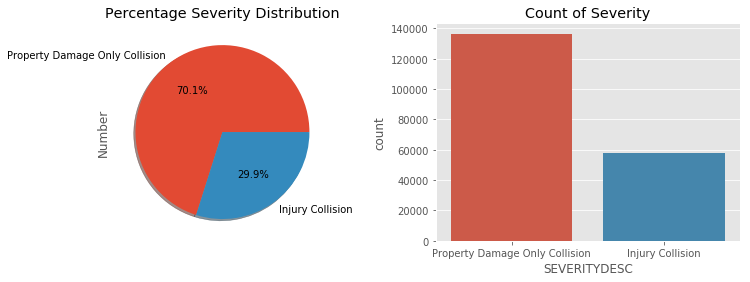

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['SEVERITYDESC'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Number')
sns.countplot('SEVERITYDESC',data=df,ax=ax[1],order=df['SEVERITYDESC'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

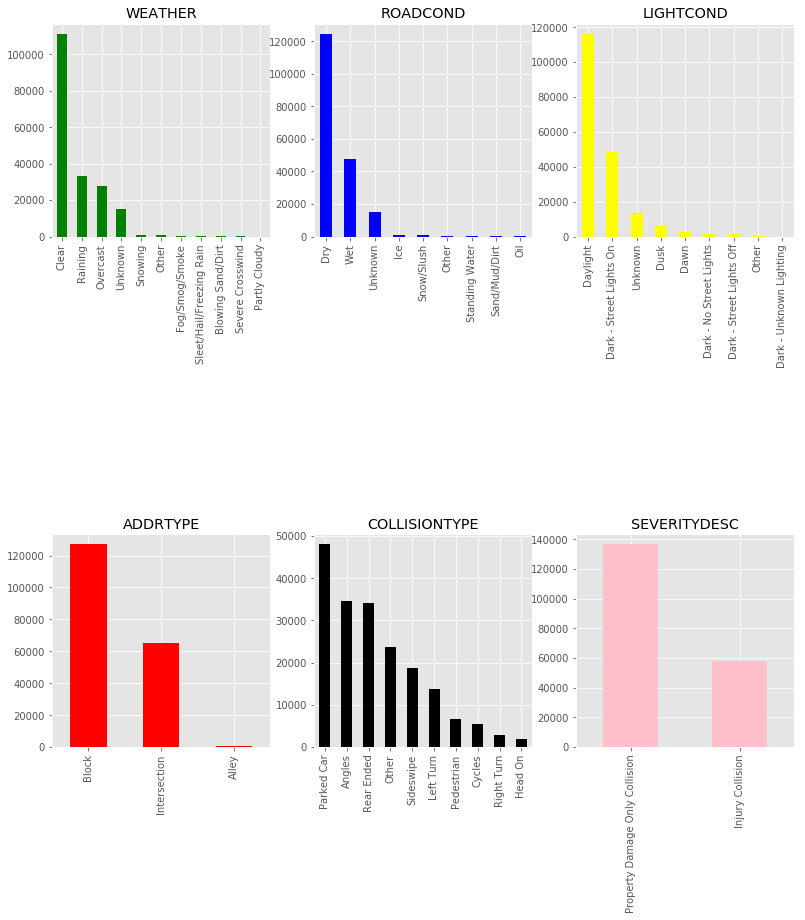

In [53]:

fig = plt.figure(figsize=(18,18)) 
fig_dims = (4, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['WEATHER'].value_counts().plot(kind='bar', color ='green',
                                     title='WEATHER')
plt.subplot2grid(fig_dims, (0, 1))
df['ROADCOND'].value_counts().plot(kind='bar',color = 'blue',
                                     title='ROADCOND')
plt.subplot2grid(fig_dims, (0, 2))
df['LIGHTCOND'].value_counts().plot(kind='bar',color = 'yellow',
                                     title='LIGHTCOND')
plt.subplot2grid(fig_dims, (2, 0))
df['ADDRTYPE'].value_counts().plot(kind='bar',color = 'red',
                                     title='ADDRTYPE')        
plt.subplot2grid(fig_dims, (2, 1))
df['COLLISIONTYPE'].value_counts().plot(kind='bar',color = 'black',
                                     title='COLLISIONTYPE') 
plt.subplot2grid(fig_dims, (2, 2))
df['SEVERITYDESC'].value_counts().plot(kind='bar',color = 'pink',
                                     title='SEVERITYDESC')

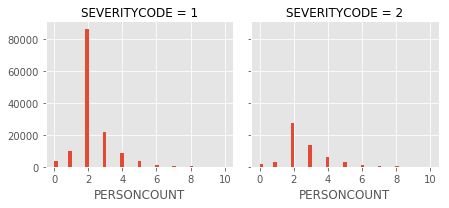

In [54]:
bins = np.linspace(0,10)
g = sns.FacetGrid(df, col='SEVERITYCODE', palette="Set2", col_wrap=4)
g.map(plt.hist, 'PERSONCOUNT', bins=bins)

plt.show()

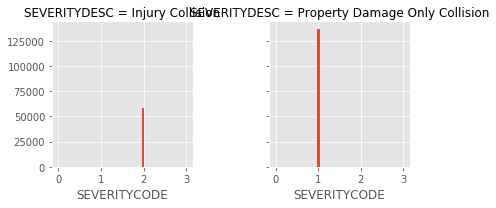

In [55]:
bins = np.linspace(0,3)
g = sns.FacetGrid(df, col='SEVERITYDESC', palette="Set2", col_wrap=8)
g.map(plt.hist, 'SEVERITYCODE', bins=bins)

plt.show()


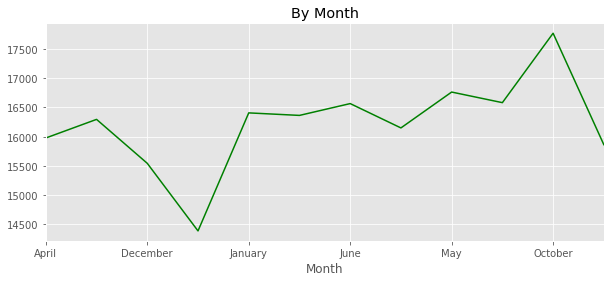

In [56]:
df.groupby("Month").size().plot(kind="line",color = 'green', title= 'By Month', figsize=(10,4))

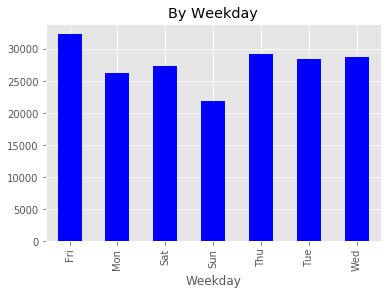

In [11]:
df.groupby("Weekday").size().plot(kind="bar",color = 'blue', title = 'By Weekday')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 41 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null datetime64[ns, UTC]
INCDTTM           194673 

In [13]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
df = df[df['Y'].notna()]
df = df[df['X'].notna()]


In [17]:
limit = 100
df_incidents = df.iloc[0:limit, :]

sanfran_map = folium.Map(location=[47.64717249,-122.3472943], zoom_start=12)

sanfran_map

In [20]:
locy = df["Y"]
locx = df["X"]

In [22]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [10]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [22]:
df['SEVERITYDESC'].replace(to_replace=['Injury Collision','Property Damage Only Collision'], value=[0,1],inplace=True)

Feature_test = df[['SEVERITYDESC','VEHCOUNT','SDOT_COLCODE']]
test_X = Feature_test

In [23]:
test_X.info

<bound method DataFrame.info of         SEVERITYDESC  VEHCOUNT  SDOT_COLCODE
0                  0         2            11
1                  1         2            16
2                  1         3            14
3                  1         3            11
4                  0         2            11
5                  1         2            11
6                  1         2            11
7                  0         1            51
8                  1         2            11
9                  0         2            11
10                 1         2            11
11                 1         2            11
12                 1         2            14
13                 1         2            13
14                 0         2            11
15                 1         0            26
16                 0         2            11
17                 1         2            14
18                 0         3            14
19                 1         2            11
20                 0   

In [24]:
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.53153084,  0.12553783, -0.41751024],
       [ 0.65294147,  0.12553783,  0.31042563],
       [ 0.65294147,  1.7102107 ,  0.01925128],
       [ 0.65294147,  1.7102107 , -0.41751024],
       [-1.53153084,  0.12553783, -0.41751024]])

In [25]:
test_Y = df['SEVERITYCODE'].values
test_Y[0:5]

array([2, 1, 1, 1, 2])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_X, test_Y, test_size=0.3, random_state=3)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [36]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)


In [41]:
yhat_knn = neigh.predict(test_X)

# jaccard
jaccard_knn = jaccard_similarity_score(test_Y, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(test_Y, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  1.0
KNN F1-score:  1.0


In [45]:
from sklearn.externals.six import StringIO

import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [9]:
feature_list = ['SEVERITYCODE','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']

In [12]:
df=df[feature_list].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 10 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         192747 non-null object
SEVERITYDESC     194673 non-null object
COLLISIONTYPE    189769 non-null object
PERSONCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     188344 non-null object
WEATHER          189592 non-null object
ROADCOND         189661 non-null object
LIGHTCOND        189503 non-null object
dtypes: int64(3), object(7)
memory usage: 14.9+ MB


In [13]:
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(182895, 10)

In [14]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 47 columns):
SEVERITYCODE                                            182895 non-null int64
PERSONCOUNT                                             182895 non-null int64
VEHCOUNT                                                182895 non-null int64
ADDRTYPE_Block                                          182895 non-null uint8
ADDRTYPE_Intersection                                   182895 non-null uint8
SEVERITYDESC_Property Damage Only Collision             182895 non-null uint8
COLLISIONTYPE_Cycles                                    182895 non-null uint8
COLLISIONTYPE_Head On                                   182895 non-null uint8
COLLISIONTYPE_Left Turn                                 182895 non-null uint8
COLLISIONTYPE_Other                                     182895 non-null uint8
COLLISIONTYPE_Parked Car                                182895 non-null uint8
COLLISIONTYPE_Pedestrian       

In [16]:
df=df_dummy
target='SEVERITYCODE'

y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [17]:
algo_lst=['Logistic Regression','Decision Trees',' K-Nearest Neighbors']
accuracy_lst=[]

In [18]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)

print('The accuracy_score of logistics regression is: {:.3f}.'.format(acc))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy_score of logistics regression is: 1.000.


In [19]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred= dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)

print('The accuracy_score of Decision Tree entropy is: {:.3f}.'.format(accuracy_entropy))

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred= dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)

acc=accuracy_gini
accuracy_lst.append(acc)

print('The accuracy_score of Decision Tree gini is: {:.3f}.'.format(accuracy_gini))

The accuracy_score of Decision Tree entropy is: 1.000.
The accuracy_score of Decision Tree gini is: 1.000.


In [20]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.994.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.994.
